## **FUNDAMENTOS TEÓRICOS**


#### **Ejemplo de neuronas simples**

Una neurona simple, va a tener una forma similar al siguiente diagrama:

<img src="https://relopezbriega.github.io/images/neurona.png">

En donde sus componentes son:

* $x_1, x_2, \dots, x_n$: son los datos de entrada en la neurona, los cuales también puede ser que sean producto de la salida de otra neurona de la red.

* $x_0$: Es la unidad de sesgo; un valor constante que se le suma a la entrada de la función de activación de la neurona. Generalmente tiene el valor 1. Este valor va a permitir cambiar la función de activación hacia la derecha o izquierda, otorgándole más flexibilidad para aprender a la neurona.

* $w_0, w_1, w_2, \dots, w_n$: Los pesos relativos de cada entrada. Tener en cuenta que incluso la unidad de sesgo tiene un peso.

* a: La salida de la neurona. Que va a ser calculada de la siguiente forma:

$$a = f\left(\sum_{i=0}^n w_i \cdot x_i \right)$$

Aquí $f$ es la ***función de activación*** de la neurona. Esta función es la que le otorga tanta flexibilidad a las [redes neuronales](https://es.wikipedia.org/wiki/Red_neuronal_artificial) y le permite estimar complejas relaciones no lineales en los datos. Puede ser tanto una [función lineal](https://es.wikipedia.org/wiki/Funci%C3%B3n_lineal), una [función logística](https://es.wikipedia.org/wiki/Funci%C3%B3n_log%C3%ADstica), [hiperbólica](https://es.wikipedia.org/wiki/Funci%C3%B3n_hiperb%C3%B3lica), etc.


## **CREACIÓN DE UN PERCEPTRON MULTICAPA (MLP)**

#### **Importación de librerias:**

In [11]:
import numpy as np

#### **Definimos las funciones de activación y sus derivadas**

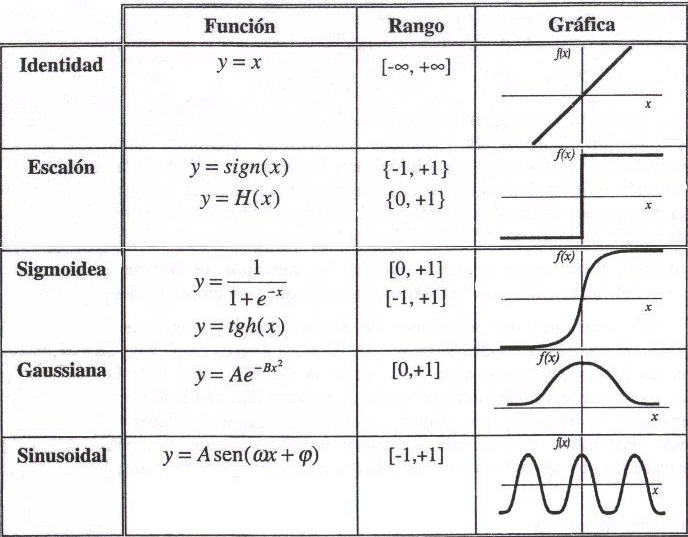

In [12]:
def sigmoid_fn(x):
    return 1.0 / ( 1.0 + np.exp( -x ) )

def sigmoid_dfn(x):
    a = sigmoid_fn( x )
    return a * ( 1.0 - a )

def tanh_fn(x):
    return np.sinh( x ) / np.cosh( x )

def tanh_dfn(x):
    a = tanh_fn( x )
    return 1.0 - np.power( a , 2.0 )

#### **Definición de parámetros:**

In [13]:
# Elegimos función activación
# activation_fn  = sigmoid_fn
# activation_dfn = sigmoid_dfn
activation_fn  = tanh_fn
activation_dfn = tanh_dfn

# Inicializamos epoca, tasa de aprendizaje
epoch = 0
reportFreq = 10000 # Cada reportFreq nos informa de cómo va el modelo.

learning_rate = 0.1 # Tasa de aprendizaje

sample_size = 1 # Dimensión de la entrada
hidden_size = 15 # tamaño de la capa oculta
output_size = 1 # tamaño de la salida

error = np.zeros( ( sample_size, 1 ) )
error

array([[0.]])

#### **Arquitectura del Perceptrón multicapa:**

http://alexlenail.me/NN-SVG/index.html

#### **Construcción del perceptrón multicapa:**

In [14]:
# Inicializamos pesos y bias de las dos capas:
layer0_weights = np.random.rand( hidden_size, sample_size )
layer0_bias = np.random.rand( hidden_size, 1 )

# print('Pesos primera capa: ' + str(layer0_weights))
# print('Sesgo de la primera capa: ' + str(layer0_bias))

layer1_weights = np.random.rand( output_size, hidden_size )
layer1_bias = np.random.rand( output_size, 1 )

# print('Pesos capa oculta: ' + str(layer1_weights))
# print('Sesgo de la capa oculta: ' +  str(layer1_bias))


In [15]:
# sample_vec = np.random.uniform( 0.0, np.pi * 2.0, ( sample_size, 1 ) )
# sample_vec
# output_vec = np.sin( sample_vec )
# output_vec
# layer1_activations = np.dot( layer0_weights, sample_vec ) + layer0_bias
# layer1_activations
# layer2_activations = np.dot( layer1_weights, layer1_outputs ) + layer1_bias
# layer2_activations
# layer2_outputs = activation_fn( layer2_activations )
# layer2_outputs
# layer2_deltas = activation_dfn( layer2_activations ) * ( layer2_outputs - output_vec )
# layer2_deltas

array([[6.18639674]])

In [16]:
# Épocas de entrenamiento (Algoritmo Backpropagation):
while epoch <= 1e5:
    
    # Generación del conjunto de entrenamiento:
      # Elegimos una muestra de entrada (uniforme [0-2pi]):
    sample_vec = np.random.uniform( 0.0, np.pi * 2.0, ( sample_size, 1 ) )
      # Calculamos la salida (seno):
    output_vec = np.sin( sample_vec )# salida real

    # Propagamos hacia adelante (entrada a oculta):
    layer1_activations = np.dot( layer0_weights, sample_vec ) + layer0_bias
    layer1_outputs = activation_fn( layer1_activations )

    # Propagamos hacia adelante (oculta a salida):
    layer2_activations = np.dot( layer1_weights, layer1_outputs ) + layer1_bias
    layer2_outputs = activation_fn( layer2_activations ) # salida predicha

    # Retropropagamos errores (salida a oculta):
    layer2_deltas = activation_dfn( layer2_activations ) * ( layer2_outputs - output_vec )

    # Retropropagamos errores (oculta a entrada):
    layer1_deltas = activation_dfn( layer1_activations ) * np.dot( layer1_weights.T, layer2_deltas )

    # Aplicamos las deltas (capa entrada):
    layer0_weights -= learning_rate * np.dot( layer1_deltas, sample_vec.T )
    layer0_bias -= learning_rate * layer1_deltas
    
    # Aplicamos las deltas (capa oculta):
    layer1_weights -= learning_rate * np.dot( layer2_deltas, layer1_outputs.T )
    layer1_bias -= learning_rate * layer2_deltas

    # Calculamos error:
    error += np.absolute( output_vec - layer2_outputs )

    # Mostramos el error:
    if epoch % reportFreq == 0:
        print( "Epoca: %d\nError: %f" % ( epoch, np.sum( error ) / float( sample_size ) / float( reportFreq ) ) )
        error = np.zeros( ( sample_size, 1 ) )

    # Incrementamos la epoca (iteramos)
    epoch += 1

Epoca: 0
Error: 0.000105
Epoca: 10000
Error: 0.625683
Epoca: 20000
Error: 0.146720
Epoca: 30000
Error: 0.136314
Epoca: 40000
Error: 0.104508
Epoca: 50000
Error: 0.069233
Epoca: 60000
Error: 0.050016
Epoca: 70000
Error: 0.039721
Epoca: 80000
Error: 0.038340
Epoca: 90000
Error: 0.034470
Epoca: 100000
Error: 0.034279


#### **Predicción a nuevos datos:**


In [17]:
# Test: aplico la red a nuevos datos
x = np.linspace(-3, np.pi * 4.0, 80)
y_real = np.sin( x )
y_pred = np.zeros( ( x.size, 1 ) )

for i,sample_vec in enumerate(x):
    # Propagamos hacia adelante (entrada a oculta):
    layer1_activations = np.dot( layer0_weights, sample_vec ) + layer0_bias
    layer1_outputs = activation_fn( layer1_activations )
    # Propagamos hacia adelante (oculta a salida):
    layer2_activations = np.dot( layer1_weights, layer1_outputs ) + layer1_bias
    layer2_outputs = activation_fn( layer2_activations )
    # Almaceno la salida
    y_pred[i]=layer2_outputs


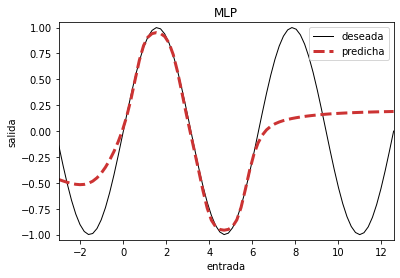

In [18]:
# Representación de la salida estimada
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x, y_real, 'k-', label='real', lw=1)
plt.plot(x, y_pred, '--', color=(0.8, 0.2, 0.2), label='predicha', lw=3)

plt.xlim([x.min(0), x.max(0)])
plt.ylim([-1.05, 1.05])
plt.xlabel('entrada')
plt.ylabel('salida')
plt.title('MLP')
plt.legend(loc="upper right")



Vemos que este perceptrón multicapa solo es capaz de predecir correctamente en el espacio entrenado. Más allá hace malas predicciones.

#### **Ejercicios propuestos:**



1. Modifica la constante de aprendizaje y trata de comprender qué ocurre.
2. Modifica el número de neuronas en la capa oculta
3. Emplea la función de activación sigmoide en lugar de tanh 
4. Entrena el perceptron en un rango más amplio y verifica si es capaz de predecir correctamente en un rango de [-2pi, 2pi]




